## Course: AI with Python
## Course Code: COMP3122
### FINAL PROJECT
### Topic: Ontario House Price Analysing
### Team: Plus 84
| ID | Team Member   |
|------|------|
|   101140366  | Thong Nguyen|
|   1XXXXXXXX  | Quang Pham|
|   1XXXXXXXX  | Tu Nguyen|
|   1XXXXXXXX  | Thanh Quan|
|   1XXXXXXXX | Elham Salmanian|

In [167]:
# Import data analysis modules
import numpy as np
import pandas as pd
# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
# Data Cleaning
houses = pd.read_csv('./properties.csv')

In [169]:
houses.head()

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [170]:
# Rename column
new_cols = ['id','address','area_name','price','latitude','longitude']
houses.columns = new_cols

In [171]:
houses.head()

,id,address,area_name,price,latitude,longitude
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [172]:
houses.describe().dtypes

id           float64
price        float64
latitude     float64
longitude    float64
dtype: object

In [173]:
houses.describe().price.astype('int64')

count       25351
mean       564543
std        847596
min             0
25%        219900
50%        371900
75%        619900
max      32500000
Name: price, dtype: int64

In [174]:
# Delete houses that are lower than 80k or contains null value
houses[houses.price < 80000]

,id,address,area_name,price,latitude,longitude
6,8,"532 Caledonia Rd Toronto, ON",Fairbank,25,43.691193,-79.461662
11,19,"47 Armstrong Ave Toronto, ON",Wallace Emerson,113,43.664101,-79.439751
13,21,"#808 - 2167 Lake Shore Blvd Toronto, ON",Parkdale,97,43.635578,-79.441345
14,22,"#2706 - 2167 Lake Shore Blvd Toronto, ON",Parkdale,49,43.635578,-79.441345
16,24,"#A - 753 Shaw St Toronto, ON",Midtown Toronto,97,43.662872,-79.423233
...,...,...,...,...,...,...
25302,124872,"5317 Upper Middle Road Burlington, ON",Burlington,1500,43.402462,-79.782341
25307,124878,"456 GRAY Road Stoney Creek, ON",Stoney Creek,0,43.230606,-79.741020
25311,124882,"238 Lakeshore Road Oakville, ON",Oakville,18,43.446323,-79.667381
25332,124906,"156 PARKDALE Avenue Hamilton, ON",Normanhurst,0,43.240665,-79.790024


In [175]:
# Assign the new dataframe to variable houses
houses = houses[houses.price > 80000]
houses

,id,address,area_name,price,latitude,longitude
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...,...
25346,124922,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,124924,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,124925,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,124928,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [176]:
# Check if the above command works
houses[houses.price<80000]

,id,address,area_name,price,latitude,longitude


In [177]:
# Sort the mean of each area in descending order
price_by_area = houses.groupby('area_name').price.agg(['min','max','mean'])
price_by_area['mean'].sort_values(ascending=False).astype('int64')

area_name
Bridle Path     15183285
Appleby          9000000
York Mills       4629115
Lytton Park      4499900
Tempo            4198333
                  ...   
Cavan              99900
Desboro            99500
Amesbury           99000
Manitouwadge       92000
Bombay             89900
Name: mean, Length: 1090, dtype: int64

In [178]:
# Check for null value
houses.isnull().sum()

id             0
address        0
area_name    415
price          0
latitude       0
longitude      0
dtype: int64

In [179]:
# Using heat map to identify missing data
missing_values = houses.isnull()
missing_values

,id,address,area_name,price,latitude,longitude
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
25346,False,False,False,False,False,False
25347,False,False,False,False,False,False
25348,False,False,False,False,False,False
25349,False,False,False,False,False,False


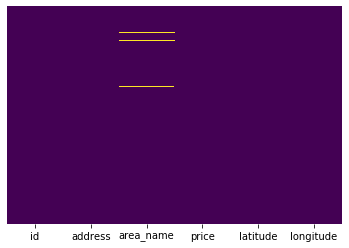

In [180]:
# data -> argument refers to the data to creat heatmap
# yticklabels -> argument avoids plotting the column names
# cbar -> argument identifies if a colorbar is required or not
# cmap -> argument identifies the color of the heatmap
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis')

In [181]:
# List all records that don't have area_name
houses[houses.area_name.isnull()]

,id,address,area_name,price,latitude,longitude
209,269,"7393 Wellington Rd 51 . Ariss, ON",NaN,699000,43.596718,-80.340660
1022,3004,"120 WOODBURN Road Glanbrook, ON",NaN,329900,-999.000000,-999.000000
1132,4089,"457289 CONCESSION 8 S Sydenham Twp, ON",NaN,729900,-999.000000,-999.000000
1186,4585,"152 MARR Drive Elora, ON",NaN,399900,43.693314,-80.437492
1192,4770,"3058 Bruce Road 20 Other Bruce Township, ON",NaN,189900,-999.000000,-999.000000
...,...,...,...,...,...,...
24558,120763,"823 English Settlement Rd Murray Ward, ON",NaN,699000,-999.000000,-999.000000
24586,121479,"3606 CEDAR GROVE ROAD Prescott, ON",NaN,399999,44.743317,-75.517426
25095,124645,"7256 Wellington Road 124 Road Guelph, ON",NaN,499900,43.494778,-80.285805
25099,124649,"7985 Tait`s Beach Rd Hamilton Township, ON",NaN,599000,44.109016,-78.273743


In [182]:
# Test the the result when dropping all the null records
houses.dropna(how='any').shape

(22797, 6)

In [183]:
# Fill records that don't have area name with the default value of UNDEFINED
houses['area_name'].fillna(value='UNDEFINED',inplace=True)

In [184]:
# Check if the above command works
houses[houses['area_name']=='UNDEFINED'].area_name

209      UNDEFINED
1022     UNDEFINED
1132     UNDEFINED
1186     UNDEFINED
1192     UNDEFINED
           ...    
24558    UNDEFINED
24586    UNDEFINED
25095    UNDEFINED
25099    UNDEFINED
25233    UNDEFINED
Name: area_name, Length: 415, dtype: object

In [185]:
# Deal with duplicated rows
houses.duplicated().sum()

0

In [186]:
# Find the house with the lowest price and the house with the highest price
# in downtown area
houses[houses.area_name=='Downtown'].agg(['min','max'])

,id,address,area_name,price,latitude,longitude
min,6,"# 2407 - 75 ST NICHOLAS ST Toronto, ON",Downtown,88000,43.637062,-79.410561
max,109461,"92 KING ST E Toronto, ON",Downtown,14500000,43.670547,-79.353928


In [187]:
# Check memory usage
houses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23212 entries, 0 to 25350
Data columns (total 6 columns):
id           23212 non-null int64
address      23212 non-null object
area_name    23212 non-null object
price        23212 non-null int64
latitude     23212 non-null float64
longitude    23212 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.0 MB


In [188]:
## Add another column named property_type to dataset
## Filter out the Condo/Apartment property
houses['property_type'] = houses[houses.address.str.contains('#')].address
houses.head()

,id,address,area_name,price,latitude,longitude,property_type
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,NaN
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,"#80 - 100 BEDDOE DR Hamilton, ON"
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,NaN
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,NaN
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,"#1409 - 230 King St Toronto, ON"


In [189]:
# Fill the NaN with the value of House
houses.fillna('House',inplace=True)
houses.head(10)

,id,address,area_name,price,latitude,longitude,property_type
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,House
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,"#80 - 100 BEDDOE DR Hamilton, ON"
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,House
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,House
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,"#1409 - 230 King St Toronto, ON"
5,7,"254A Monarch Park Ave Toronto, ON",Old East York,1488000,43.686375,-79.328918,House
7,9,"11 REBECCA Street Hamilton, ON",Central Hamilton,254900,43.258541,-79.867615,House
8,10,"617 BRIGADOON Drive Hamilton, ON",Gourley,364900,43.216557,-79.904991,House
9,12,"51 - 255 MOUNT ALBION Road Hamilton, ON",Red Hill,304900,43.215706,-79.794189,House
10,13,"1170 LAMBTON Drive Oakville, ON",Clearview,1289000,43.495579,-79.658272,House


In [190]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23212 entries, 0 to 25350
Data columns (total 7 columns):
id               23212 non-null int64
address          23212 non-null object
area_name        23212 non-null object
price            23212 non-null int64
latitude         23212 non-null float64
longitude        23212 non-null float64
property_type    23212 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ MB


In [191]:
# Assign those rows that don't have the property_type of House the value Condo/Apartment
houses.loc[houses['property_type'] != 'House', 'property_type'] = "Condo/Apartment"

In [192]:
houses.head(10)

,id,address,area_name,price,latitude,longitude,property_type
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,House
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,Condo/Apartment
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,House
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,House
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,Condo/Apartment
5,7,"254A Monarch Park Ave Toronto, ON",Old East York,1488000,43.686375,-79.328918,House
7,9,"11 REBECCA Street Hamilton, ON",Central Hamilton,254900,43.258541,-79.867615,House
8,10,"617 BRIGADOON Drive Hamilton, ON",Gourley,364900,43.216557,-79.904991,House
9,12,"51 - 255 MOUNT ALBION Road Hamilton, ON",Red Hill,304900,43.215706,-79.794189,House
10,13,"1170 LAMBTON Drive Oakville, ON",Clearview,1289000,43.495579,-79.658272,House


In [193]:
## calculate the price of house group by property type
houses.groupby('property_type').price.agg(['min','max','mean'])

,min,max,mean
property_type,,,
Condo/Apartment,82000,12900000,446924.958405
House,80500,32500000,662233.531425


In [194]:
## Find the Condo/Apartment with the min and max price in the dataset
houses[houses.property_type=='Condo/Apartment'].max()

id                                        124922
address          lot #4 Regal Place Waterloo, ON
area_name                York University Heights
price                                   12900000
latitude                                  49.738
longitude                                -74.709
property_type                    Condo/Apartment
dtype: object

In [195]:
houses[houses.property_type=='Condo/Apartment'].min()

id                                                         1
address          # 1 - 4265 THOMAS ALTON BLVD Burlington, ON
area_name                                          Agincourt
price                                                  82000
latitude                                                -999
longitude                                               -999
property_type                                Condo/Apartment
dtype: object

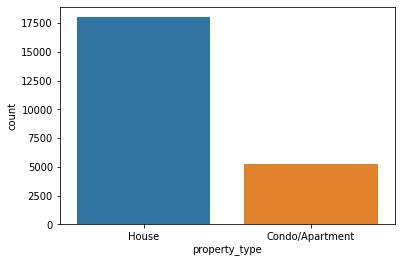

In [196]:
# Use the countplot() method to identify ratio of house and condo/apartment
sns.countplot(x='property_type',data=houses)

In [197]:
## Find the house with the min and max price in the dataset
houses[houses.property_type=='House'].max()

id                                  124929
address          Wigamog Rd Haliburton, ON
area_name                           Zurich
price                             32500000
latitude                            53.851
longitude                          1.07452
property_type                        House
dtype: object

In [198]:
houses[houses.property_type=='House'].min()

id                   0
address             ON
area_name        Acton
price            80500
latitude          -999
longitude         -999
property_type    House
dtype: object

In [199]:
# List all the properties located in Toronto and sort values in desencding order
houses.loc[houses.address.str.contains('Toronto'),].sort_values('price',ascending=False)

,id,address,area_name,price,latitude,longitude,property_type
1889,5798,"10 HIGH POINT RD Toronto, ON",Bridle Path,26800000,43.735306,-79.372612,House
21597,79960,"16 High Point Rd Toronto, ON",Bridle Path,18800000,43.734344,-79.371315,House
20994,77248,"14 The Bridle Path Toronto, ON",Bridle Path,15300000,43.739182,-79.379913,House
21720,82766,"120 INGLEWOOD DR Toronto, ON",Midtown Toronto,14880000,43.688107,-79.385658,House
20759,76782,"31 Knightswood Rd Toronto, ON",York Mills,14800000,43.739323,-79.391823,House
...,...,...,...,...,...,...,...
1721,5630,"1174 BLOOR ST W Toronto, ON",Wallace Emerson,84990,43.659683,-79.437279,House
22580,95270,"#Store - 121 OSSINGTON AVE Toronto, ON",Trinity - Bellwoods,84000,43.646778,-79.419640,Condo/Apartment
1793,5702,"#3 - 94 HALSEY AVE Toronto, ON",Woodbine Gardens,82800,43.699581,-79.297829,Condo/Apartment
20264,74142,"615 BLOOR ST W Toronto, ON",Palmerston - Little Italy,82500,43.664452,-79.413788,House


In [200]:
houses.dtypes

id                 int64
address           object
area_name         object
price              int64
latitude         float64
longitude        float64
property_type     object
dtype: object

In [201]:
# Create another columns named city by analyzing the address series
test_city = houses.address.str.split(',')[0][0]

In [202]:
test_city.split(' ')[-1]

'Toronto'

In [203]:
test_address = houses['address']

In [204]:
test_address

0                         86 Waterford Dr Toronto, ON
1                    #80 - 100 BEDDOE DR Hamilton, ON
2                      213 Bowman Street Hamilton, ON
3                        102 NEIL Avenue Hamilton, ON
4                     #1409 - 230 King St Toronto, ON
                             ...                     
25346         3100 CARLING AVENUE UNIT#416 Ottawa, ON
25347                5827 GLADEWOODS PLACE Ottawa, ON
25348                6349 DEERMEADOW DRIVE Ottawa, ON
25349                       212 ALVIN ROAD Ottawa, ON
25350    BARTON Street BARTON Street Stoney Creek, ON
Name: address, Length: 23212, dtype: object

In [205]:
test_address.str.split(',')

0                         [86 Waterford Dr Toronto,  ON]
1                    [#80 - 100 BEDDOE DR Hamilton,  ON]
2                      [213 Bowman Street Hamilton,  ON]
3                        [102 NEIL Avenue Hamilton,  ON]
4                     [#1409 - 230 King St Toronto,  ON]
                              ...                       
25346         [3100 CARLING AVENUE UNIT#416 Ottawa,  ON]
25347                [5827 GLADEWOODS PLACE Ottawa,  ON]
25348                [6349 DEERMEADOW DRIVE Ottawa,  ON]
25349                       [212 ALVIN ROAD Ottawa,  ON]
25350    [BARTON Street BARTON Street Stoney Creek,  ON]
Name: address, Length: 23212, dtype: object

In [206]:
test_address = test_address.str.split(',')

In [207]:
test_address

0                         [86 Waterford Dr Toronto,  ON]
1                    [#80 - 100 BEDDOE DR Hamilton,  ON]
2                      [213 Bowman Street Hamilton,  ON]
3                        [102 NEIL Avenue Hamilton,  ON]
4                     [#1409 - 230 King St Toronto,  ON]
                              ...                       
25346         [3100 CARLING AVENUE UNIT#416 Ottawa,  ON]
25347                [5827 GLADEWOODS PLACE Ottawa,  ON]
25348                [6349 DEERMEADOW DRIVE Ottawa,  ON]
25349                       [212 ALVIN ROAD Ottawa,  ON]
25350    [BARTON Street BARTON Street Stoney Creek,  ON]
Name: address, Length: 23212, dtype: object

In [208]:
# Use lambda function to get the first part of the address, which contains street and city
street_and_city = test_address.apply(lambda x: x[0])

In [209]:
# Use lambda function again to get city from the street and city object
city = street_and_city.str.split(' ').apply(lambda x: x[-1])

In [210]:
city

0         Toronto
1        Hamilton
2        Hamilton
3        Hamilton
4         Toronto
           ...   
25346      Ottawa
25347      Ottawa
25348      Ottawa
25349      Ottawa
25350       Creek
Name: address, Length: 23212, dtype: object

In [211]:
houses.shape

(23212, 7)

In [212]:
# Add the city column to the DataFrame and assign the value of city object to that column
houses['city'] = city

In [213]:
houses.head()

,id,address,area_name,price,latitude,longitude,property_type,city
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,House,Toronto
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,Condo/Apartment,Hamilton
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,House,Hamilton
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,House,Hamilton
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,Condo/Apartment,Toronto


In [214]:
# Check how many city does the DataFrame have
houses.city.nunique()

579

In [215]:
# It only works with cities that have one word
houses.drop('city',axis=1,inplace=True)

In [216]:
# Using map to create dummy variable for property type
houses['proptype_dummy'] = houses.property_type.map({'House':0,'Condo/Apartment':1})

In [217]:
houses.head()

,id,address,area_name,price,latitude,longitude,property_type,proptype_dummy
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,House,0
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,Condo/Apartment,1
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,House,0
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,House,0
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,Condo/Apartment,1


In [218]:
# 1. Import
# Import module for fitting
from sklearn.linear_model import LogisticRegression

In [219]:
# 2. Instantiate model to prevent future warning
# Create instance of LogisticRegression
logreg = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')

In [220]:
# Split data into 'X' features and 'y' target label sets
feature_cols = ['price']

In [221]:
# Fetch all rows and feature columns
X = houses.loc[:,feature_cols]

In [222]:
X.shape

(23212, 1)

In [223]:
# Create 'Y' target label
y = houses['proptype_dummy']

In [224]:
# Import module to split dataset
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [225]:
# 3. Fit
# Create the train model
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [226]:
# 4. Predict
y_pred=logreg.predict(X_test)

In [227]:
# Create X_new features for test data
test = houses.drop('proptype_dummy',axis=1)

In [228]:
test.head()

,id,address,area_name,price,latitude,longitude,property_type
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,House
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,Condo/Apartment
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,House
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,House
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,Condo/Apartment


In [229]:
# import classification_report to see the precision of model
from sklearn.metrics import classification_report

In [230]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4455
           1       0.00      0.00      0.00      1348

    accuracy                           0.77      5803
   macro avg       0.38      0.50      0.43      5803
weighted avg       0.59      0.77      0.67      5803



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [231]:
# Split every columns of classification
lines = classification_report(y_test,y_pred).split("\n")

In [232]:
classes =[]
plotMap=[]
support = []
class_name=[]

In [233]:
for line in lines[2: len(lines)-5] : 
    t= line.strip().split()
    classes.append(t[0])
    v=[float(x) for x in t[1: len(t) - 1 ]]
    support.append(t[-1])
    class_name.append(t[0])
    print(v)
    plotMap.append(v)
    

[0.77, 1.0, 0.87]
[0.0, 0.0, 0.0]


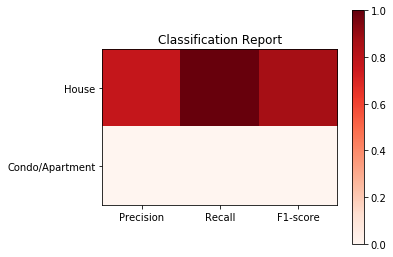

In [241]:
#Plot classification
plt.title("Classification Report")
x_tick_marks = np.arange(3)
xticklabels = ['Precision', 'Recall', 'F1-score']
y_tick_marks = np.arange(len(classes))
plt.xticks(x_tick_marks, xticklabels)
plt.yticks(y_tick_marks, ["House","Condo/Apartment"])

plt.tight_layout()

plt.imshow(plotMap, interpolation='nearest', cmap=plt.cm.Reds)
plt.colorbar()